In [1]:
#este arquivo contém o desenvolvimento para o desafio final do Bootcamp de Analista de dados do IGTI

1) Iniciar a seção SPARK

In [2]:
from pyspark.sql import SparkSession #importa a biblioteca que cria a seção do spark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#inicia a seção para a utilização do spark
spark = SparkSession.builder.appName("desafio_IGTI").getOrCreate() #cria a seção caso não exista ou obtém a já criada

In [4]:
%fs ls /FileStore/tables   

UsageError: Line magic function `%fs` not found.


In [5]:
diretorio_dataset="healthcare-dataset-stroke-data.csv"  #diretório que contém o arquivo a ser utilizado

In [11]:
dataset_desafio = spark.read.format("csv").options(header="true", inferschema="true").load(diretorio_dataset)  #realiza a leitura do dataset

In [12]:
dataset_desafio.printSchema() #mostra o esquema inferido pelas variáveis

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: string (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



Respectivamente, quantas variáveis do tipo string e inteira existem no dataset?

In [13]:
#número de instancias no dataset
dataset_desafio.count()

5110

In [6]:
dataset = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [8]:
dataset['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [20]:
dataset

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [27]:
dataset['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [29]:
dataset['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [13]:
dataset['bmi'].isna()

0       False
1        True
2       False
3       False
4       False
        ...  
5105     True
5106    False
5107    False
5108    False
5109    False
Name: bmi, Length: 5110, dtype: bool

In [28]:
dataset['avg_glucose_level'].median()

91.88499999999999

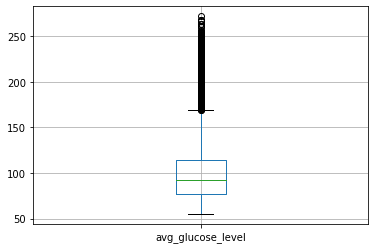

In [14]:
dataset.boxplot(column=['avg_glucose_level'])

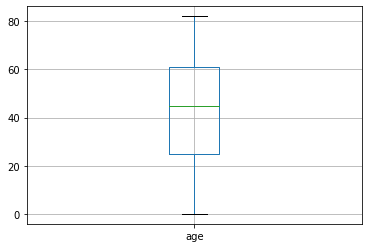

In [16]:
dataset.boxplot(column=['age'])

In [17]:
corr = dataset[['smoking_status', 'stroke']].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,stroke
stroke,1.00


In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [22]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Quantas instâncias e atributos, respectivamente, existem no dataset?

In [14]:
dataset_desafio.show() #mostra as linhas iniciais do dataset

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21| N/A|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

Conhecendo o dataset

In [14]:
#seleção de colunas
dataset_desafio.select('age','hypertension').show(5)

+----+------------+
 age|hypertension|
+----+------------+
67.0| 0|
61.0| 0|
80.0| 0|
49.0| 0|
79.0| 1|
+----+------------+
only showing top 5 rows

In [15]:
#agrupando os dados
display(dataset_desafio.groupby('gender','stroke').count().sort("count",ascending=True))

gender,stroke,count
Other,0,1
Male,1,108
Female,1,141
Male,0,2007
Female,0,2853


Analisando o gráfico anterior, o que podemos dizer sobre o derrame entre homens e mulheres?

In [17]:
#agrupando os dados
display(dataset_desafio.groupby('smoking_status','stroke').count().sort("count",ascending=True))

smoking_status,stroke,count
smokes,1,42
Unknown,1,47
formerly smoked,1,70
never smoked,1,90
smokes,0,747
formerly smoked,0,815
Unknown,0,1497
never smoked,0,1802


In [18]:
#agrupando os dados
display(dataset_desafio.groupby('hypertension','stroke').count().sort("count",ascending=True))

hypertension,stroke,count
1,1,66
0,1,183
1,0,432
0,0,4429


O que podemos dizer sobre o gráfico anterior?

In [20]:
display(dataset_desafio.groupby('stroke').count())

stroke,count
1,249
0,4861


O dataset está balanceado?

In [22]:
#utilizando crosstab para contar a quantidade de indivíduos com que ganho mais de 50K pela idade
dataset_desafio.filter(dataset_desafio.gender== 'Female').count()

Out[113]: 2994

In [23]:
#contando as classes
dataset_desafio.groupBy("work_type").agg({'work_type': 'count'}).sort(asc("count(work_type)")).show()

+-------------+----------------+
 work_type|count(work_type)|
+-------------+----------------+
 Never_worked| 22|
 Govt_job| 657|
 children| 687|
Self-employed| 819|
 Private| 2925|
+-------------+----------------+

In [24]:
entradas_numericas  = ['age',"avg_glucose_level", "bmi"]
dataset_desafio.describe(entradas_numericas).show(truncate=False)

+-------+------------------+------------------+------------------+
summary|age |avg_glucose_level |bmi |
+-------+------------------+------------------+------------------+
count |5110 |5110 |5110 |
mean |43.226614481409015|106.14767710371804|28.893236911794673|
stddev |22.61264672311348 |45.28356015058193 |7.85406672968016 |
min |0.08 |55.12 |10.3 |
max |82.0 |271.74 |N/A |
+-------+------------------+------------------+------------------+

Qual é a média das idades dos participantes da pesquisa?

In [26]:
#boxplot
display(dataset_desafio.select('avg_glucose_level'))

avg_glucose_level
228.69
202.21
105.92
171.23
174.12
186.21
70.09
94.39
76.15
58.57


Pelo gráfico anterior, qual é o valor da mediana?

Pelo gráfico anterior, o que podemos dizer sobre a existência ou não de outliers?

In [29]:
#boxplot
display(dataset_desafio.select('age'))

age
67.0
61.0
80.0
49.0
79.0
81.0
74.0
69.0
59.0
78.0


Pelo gráfico anterior, qual é o valor do primeiro quartil?

Pelo gráfico anterior, o que podemos dizer sobre os outliers?

3) Pré-processamento dos dados

In [33]:
#contando a quantidade de valores desconhecidos
from pyspark.sql.functions import *
dataset_desafio.groupby('Residence_type').agg({'Residence_type': 'count'}).sort(asc("count(Residence_type)")).show()

+--------------+---------------------+
Residence_type|count(Residence_type)|
+--------------+---------------------+
 Rural| 2514|
 Urban| 2596|
+--------------+---------------------+

Quantas classes diferentes de trabalho (work_type) existem no dataset? Fiquem atentos, pois não é essa informação que o tabela anterior está exibindo.

In [35]:
from pyspark.sql.functions import mean
mean = dataset_desafio.select(mean(dataset_desafio['bmi'])).collect()
mean_bmi = mean[0][0]
dataset_desafio = dataset_desafio.na.fill(mean_bmi,['bmi'])

In [36]:
#aplicando o filtro para as colunas que possuem valores não conhecidos
dataset_filtrado=dataset_desafio.filter((dataset_desafio['bmi'] != 'N/A') & (dataset_desafio['smoking_status'] > 'Unknown'))

In [37]:
# aplicando a transformação dos dados categóricos
from pyspark.ml.feature import VectorAssembler,OneHotEncoder, StringIndexer

In [38]:
#define a transformação para a variável "gender"
stringIndexer_gender=StringIndexer(inputCol="gender", outputCol="gender_encoded")  #label encoding
encoder_gender = OneHotEncoder(dropLast=False, inputCol="gender_encoded", outputCol="genderVec") #one-hot encoding

In [39]:
#define a transformação para a variável "ever_married"
stringIndexer_married=StringIndexer(inputCol="ever_married", outputCol="ever_married_encoded") #label encoding
encoder_married = OneHotEncoder(dropLast=False, inputCol="ever_married_encoded", outputCol="marriedVec") #one-hot encoding

In [40]:
#define a transformação para a variável "work_type"
stringIndexer_work=StringIndexer(inputCol="work_type", outputCol="work_type_encoded")  #label encoding
encoder_work = OneHotEncoder(dropLast=False, inputCol="work_type_encoded", outputCol="workVec") #one-hot encoding

In [41]:
#define a transformação para a variável "Residence_type"
stringIndexer_residence=StringIndexer(inputCol="Residence_type", outputCol="Residence_type_encoded")  #label encoding
encoder_residence = OneHotEncoder(dropLast=False, inputCol="Residence_type_encoded", outputCol="residenceVec") #one-hot encoding

In [42]:
#define a transformação para a variável "smoking_status"
stringIndexer_smoking=StringIndexer(inputCol="smoking_status", outputCol="smoking_status_encoded")  #define o objeto
encoder_smoking = OneHotEncoder(dropLast=False, inputCol="smoking_status_encoded", outputCol="smokingVec")#one-hot encoding

In [43]:
#define a construção do vetor de entrada
colunas_entrada=['age','hypertension', 'heart_disease','avg_glucose_level','genderVec','marriedVec','workVec','residenceVec','smokingVec']
vetor_entrada = VectorAssembler(inputCols=colunas_entrada,outputCol='features')

In [44]:
#define a sequencia de transformações para o pipeline
sequencia_transformacoes=[stringIndexer_gender,stringIndexer_married,stringIndexer_work,stringIndexer_residence,stringIndexer_smoking,encoder_gender,encoder_married,encoder_work,encoder_residence,encoder_smoking,vetor_entrada]

In [45]:
from pyspark.ml import Pipeline
# Aplicando o pipeline
pipeline = Pipeline(stages=sequencia_transformacoes)
pipelineModel = pipeline.fit(dataset_filtrado)
model = pipelineModel.transform(dataset_filtrado)

In [46]:
#mostrando parte dos dados para entrada
model.select('age','gender','genderVec','ever_married','marriedVec','features').show()

+----+------+-------------+------------+-------------+--------------------+
 age|gender| genderVec|ever_married| marriedVec| features|
+----+------+-------------+------------+-------------+--------------------+
67.0| Male|(3,[1],[1.0])| Yes|(2,[0],[1.0])|(19,[0,2,3,5,7,9,...|
80.0| Male|(3,[1],[1.0])| Yes|(2,[0],[1.0])|(19,[0,2,3,5,7,9,...|
49.0|Female|(3,[0],[1.0])| Yes|(2,[0],[1.0])|(19,[0,3,4,7,9,14...|
79.0|Female|(3,[0],[1.0])| Yes|(2,[0],[1.0])|(19,[0,1,3,4,7,10...|
81.0| Male|(3,[1],[1.0])| Yes|(2,[0],[1.0])|(19,[0,3,5,7,9,14...|
74.0| Male|(3,[1],[1.0])| Yes|(2,[0],[1.0])|(19,[0,1,2,3,5,7,...|
69.0|Female|(3,[0],[1.0])| No|(2,[1],[1.0])|(19,[0,3,4,8,9,14...|
81.0|Female|(3,[0],[1.0])| Yes|(2,[0],[1.0])|(19,[0,1,3,4,7,9,...|
61.0|Female|(3,[0],[1.0])| Yes|(2,[0],[1.0])|(19,[0,2,3,4,7,11...|
54.0|Female|(3,[0],[1.0])| Yes|(2,[0],[1.0])|(19,[0,3,4,7,9,14...|
79.0|Female|(3,[0],[1.0])| Yes|(2,[0],[1.0])|(19,[0,2,3,4,7,9,...|
50.0|Female|(3,[0],[1.0])| Yes|(2,[0],[1.0])|(19,[0,1,3,4,7,10...|
64.0| Male|(3,[1],[1.0])| Yes|(2,[0],[1.0])|(19,[0,2,3,5,7,9,...|
75.0| Male|(3,[1],[1.0])| Yes|(2,[0],[1.0])|(19,[0,1,3,5,7,9,...|
60.0|Female|(3,[0],[1.0])| No|(2,[1],[1.0])|(19,[0,3,4,8,9,14...|
71.0|Female|(3,[0],[1.0])| Yes|(2,[0],[1.0])|(19,[0,3,4,7,11,1...|
52.0|Female|(3,[0],[1.0])| Yes|(2,[0],[1.0])|(19,[0,1,3,4,7,10...|
79.0|Female|(3,[0],[1.0])| Yes|(2,[0],[1.0])|(19,[0,3,4,7,10,1...|
71.0| Male|(3,[1],[1.0])| Yes|(2,[0],[1.0])|(19,[0,3,5,7,9,14...|
80.0| Male|(3,[1],[1.0])| Yes|(2,[0],[1.0])|(19,[0,3,5,7,10,1...|
+----+------+-------------+------------+-------------+--------------------+
only showing top 20 rows

In [47]:
#dividindo o dataset entre teste e treinamento
train_data, test_data = model.randomSplit([.8,.2],seed=1)

Qual foi, respectivamente, o percentual de dados escolhidos para treinamento e teste dos modelos?

In [49]:
#mostrando os dados de treinamento
train_data.columns

Out[132]: ['id',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke',
 'gender_encoded',
 'ever_married_encoded',
 'work_type_encoded',
 'Residence_type_encoded',
 'smoking_status_encoded',
 'genderVec',
 'marriedVec',
 'workVec',
 'residenceVec',
 'smokingVec',
 'features']

Realizando a previsão através da Regressão Logística

In [51]:
#define o modelo de regrssão logística
from pyspark.ml.classification import LogisticRegression

#instancia o objeto para a regressão logística
lr = LogisticRegression(labelCol="stroke",featuresCol="features", maxIter=100, regParam=0.3, )

# treina o modelo
linearModel = lr.fit(train_data)

In [52]:
#realiza a previsão utilizando o modelo de regressão logística
previsao_regressao = linearModel.transform(test_data)

In [53]:
#avaliando a classificação realizada pela regressão logística
acc_evaluator = MulticlassClassificationEvaluator(labelCol="stroke", predictionCol="prediction", metricName="accuracy")
acuracia_regressao = acc_evaluator.evaluate(previsao_regressao)
print('Regressão Logística: {0:2.2f}%'.format(acuracia_regressao*100))

Regressão Logística: 94.52%